# <center> Workshop - Introduction to the Climate-Land-Energy-Water systems (CLEWs) modelling framework and its use in the Nexus Assessment of the Drin River Basin </center>

<br>
<font size="4">

The aim of this session is to explore the functionalities offered by OSeMOSYS using the water-energy model of the Drin basin and some of its selected insights. 

To get the maximum out of this session, we will ask everyone to work actively with the group to answer the given questions that you will see below.

However, before jumping into the questions, you will be first introduced to the model structure and get familiar with each scenario and its key assumptions. All this information is given in this notebook and the instructors are ready to give you more information if needed. All what you need is to read the through this notebook carefully. If you still have some questions, feel free to ask for help.

This notebook is structured in three sections as follows:
* Part 1 provides a background on the Drin water-energy model
* Part 2 navigates through the scenarios
* Part 3 requires you to answer some questions using the given results in each section. 

</font>



  ![DRIN River Basin](drin.png)



In [ ]:
%run -i "packages.py"

In [ ]:
# code to hide the code cells 
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


In [ ]:
# Long code that take the CBC output files and filter the dataframes to take in only what is necessary.
# Run only if necessary
%run -i "input_proces.py"

In [ ]:
# Interim processes to create the final dataframe for plotting
%run -i "interim_proces.py"

# Part1: Background - Drin Model structure

<br>
<font size="4">
Under the framework of the Drin Nexus assessment an integrated water-energy model for the Drin countries was developed. The model consists of two parts: an accounting model that represents the hydrological characteristics and balances in the Drin River Basin (Panta Rhei) and a long-term energy investment optimization model that calculates the least-cost energy supply mix to meet the electricity demands (built with the modelling framework OSeMOSYS). This training session will focus on OSeMOSYS, but all scenarios are based on inputs from Panta Rhei. 
</font>

###  <font color='green'>Which technologies were considered in the model?</font> 

<br>
<font size="4">
The water-energy model of the Drin basin is actually a multi-country model that includes the entire electricity system of all the four riparian countries (Albania, North Macedonia, Montenegro and Kosovo). This includes:
* all thermal power plants,
* all hydro power plants,
* other non-hydro renewables such as solar and wind,
* electricity trade inter-connectors (due to the lack of information, each country was assigned two inter-connectors, one for exports and one for imports)
</font>



### <font color='green'>How was the cascade in the Drin basin represented? </font> 
<br>
<font size="4">
To explore the impact of the different proposed scenarios in the Drin basin, the two cascades in the Drin river basin were detailed as shown in the following schematic. This part is where the integration with Panta Rhei was crucial. 
</font>

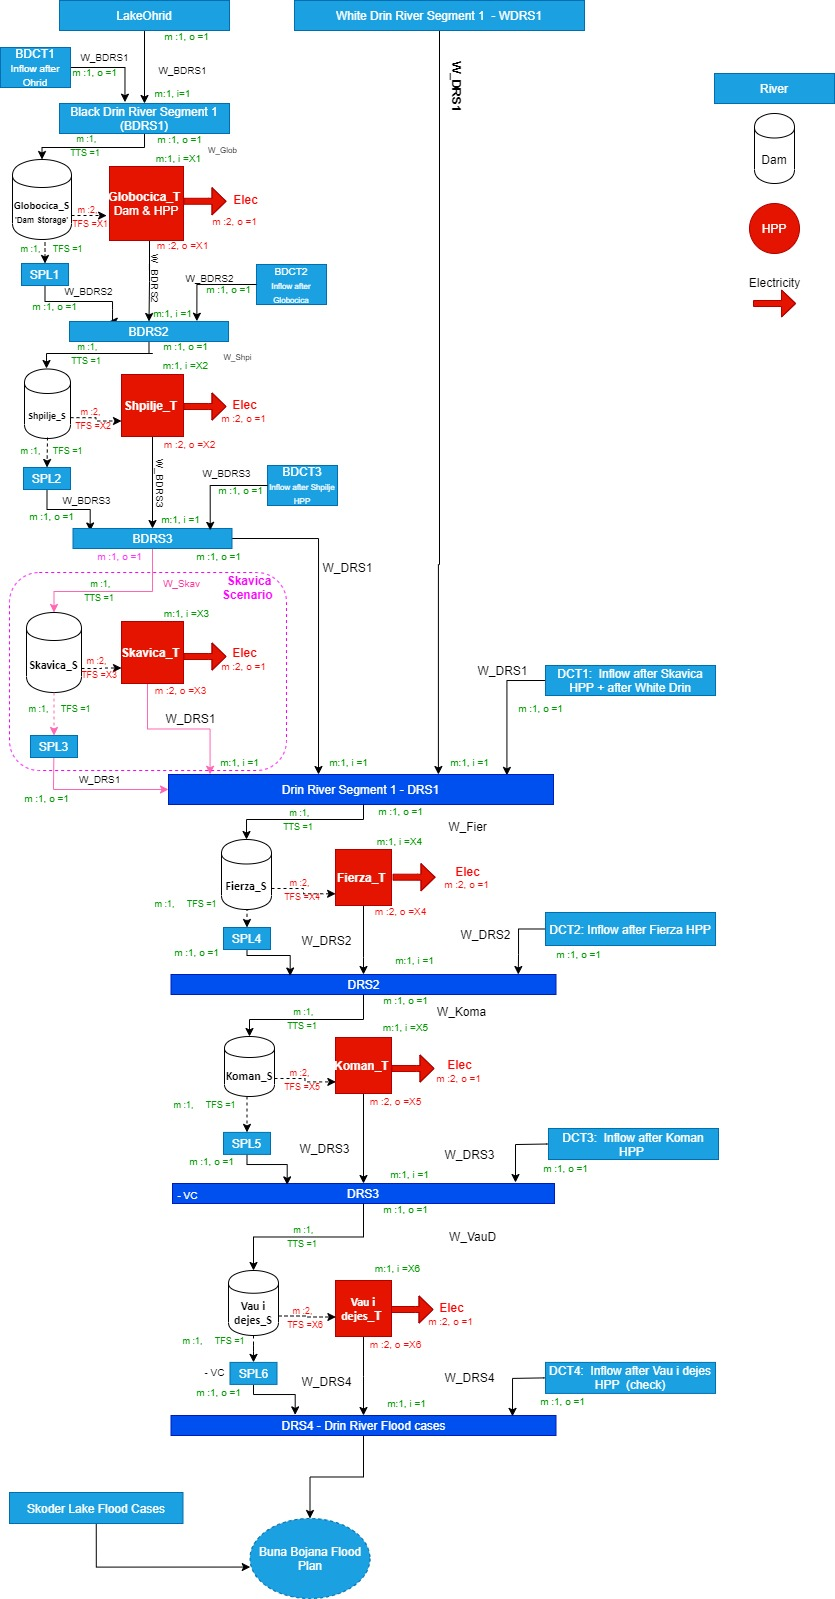


# Part 2: Scenarios and selected insights  


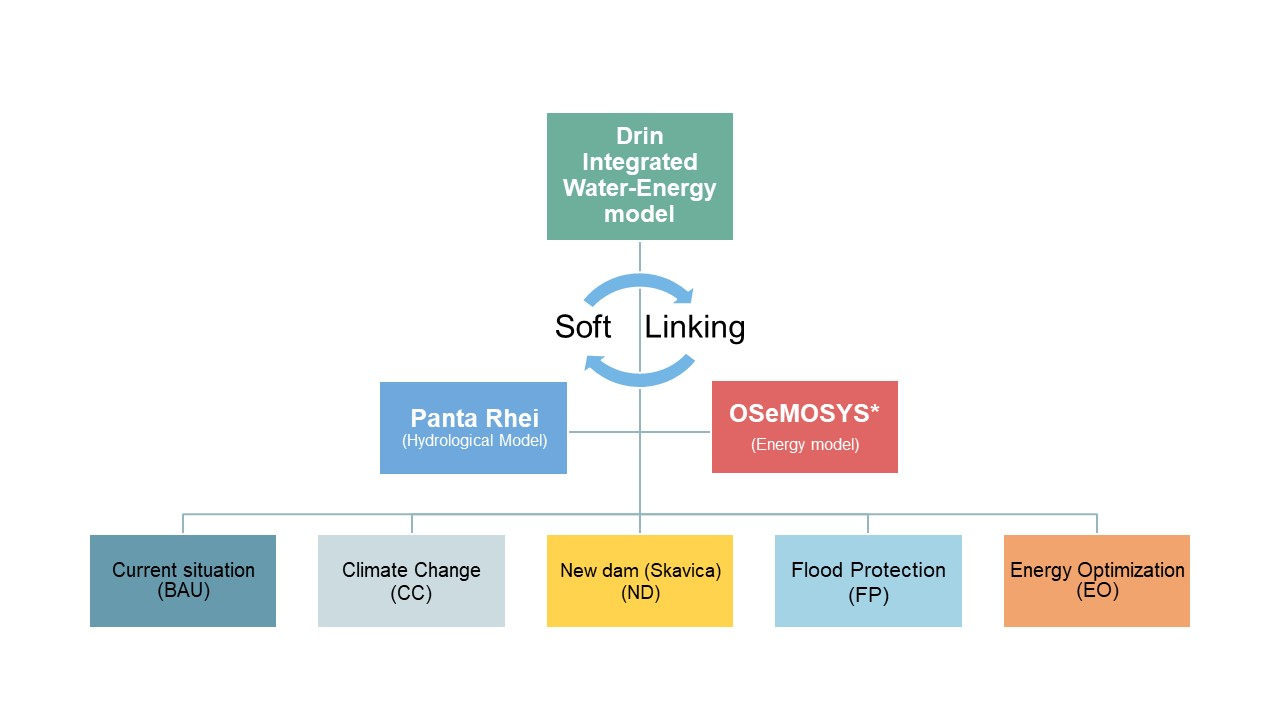

<br>
<font size="4">
    
[Scenario 1: Reference ](#Scenario-1:-Reference) 

[Scenario 2: Climate Change ](#Scenario-2:-Climate-Change) 

[Scenario 3: New Dam "Skavica" ](#Scenario-3:-New-dam-"Skavica") 

[Scenario 4: Flood Protection ](#Scenario-4-Flood-Protection) 

[Scenario 5: Energy Maximization ](#Scenario-5:-Energy-Maximization) 


# Scenario 1: Reference

<br>
<font size="4">
This scenario represents the current situation in the Drin riparian countries (with the focus on the Drin Basin), knowing that that the HPPs operation is not considering the coordination between countries or the flood forecasting system that exists in the DRB. This scenario serves as the reference to compare all other scenarios. The temporal resolution in this scenario (and others) is weekly, which means that the average water discharge in each part of the river is represented on a weekly basis. For extreme conditions, the discharges of the wet, dry and normal year with monthly temporal resolution were calculated.
</font> 

## <font color='red'>Question1 </font> 
<br>
<font size="4">
How is the role of hydro and non-hydro renewables expected to evolve in the reference scenario? What model assumptions do you think could be causing this?
</font> 

In [ ]:
%run -i "figure1a.py" 
fig1a

In [ ]:
%run -i "figure1b.py" 
fig1b

In [ ]:
def df_plot(df,y_title,p_title):
    if len(df.columns)==1:
        print('There are no values for the result variable that you want to plot')
    else:
        fig1c = df.iplot(x='y',
             kind='bar', 
             barmode='relative',
             xTitle='Year',
             yTitle=y_title,
             color=[color_dict[x] for x in df.columns if x != 'y'],
             title=(p_title),
             showlegend=True,
             asFigure=True)
        #pio.write_image(fig, '{}.png'.format(p_title))
        #df.to_csv(os.path.join(homedir,p_title+".csv"))
        return iplot(fig1c)

In [ ]:
all_params={}
#Data operation on the CBC output file
#Read CBC output file
df = pd.read_csv("REF"+ "\cbcoutput.txt", sep='\t')
df.columns = ['temp']
df['temp'] = df['temp'].str.lstrip(' *\n\t')
df[['temp','value']] = df['temp'].str.split(')', expand=True)
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)
df['value'] = df['value'].str.split(' ', expand=True)
df[['parameter','id']] = df['temp'].str.split('(', expand=True)
df['parameter'] = df['parameter'].str.split(' ', expand=True)[1]
df = df.drop('temp', axis=1)
df['value'] = df['value'].astype(float).round(4)
params = df.parameter.unique()
cols = {'NewCapacity':['r','t','y'],
        'AccumulatedNewCapacity':['r','t','y'], 
        'TotalCapacityAnnual':['r','t','y'],
        'CapitalInvestment':['r','t','y'],
        'AnnualVariableOperatingCost':['r','t','y'],
        'AnnualFixedOperatingCost':['r','t','y'],
        'SalvageValue':['r','t','y'],
        'DiscountedSalvageValue':['r','t','y'],
        'TotalTechnologyAnnualActivity':['r','t','y'],
        'RateOfActivity':['r','l','t','m','y'],
        'RateOfTotalActivity':['r','t','l','y'],
        'Demand':['r','l','f','y'],
        'TotalAnnualTechnologyActivityByMode':['r','t','m','y'],
        'TotalTechnologyModelPeriodActivity':['r','t'],
        'ProductionByTechnologyAnnual':['r','t','f','y'],
        'UseByTechnologyAnnual':['r','t','f','y'],
        'ProductionByTechnology':['r','l','t','f','y'],
        'UseByTechnology':['r','l','t','f','y'],
        'AnnualTechnologyEmissionByMode':['r','t','e','m','y'],
        'AnnualTechnologyEmission':['r','t','e','y'],
        'AnnualEmissions':['r','e','y'],
        'StorageLevelTSStart':['r','s','l','y'],
        'StorageLevelStart':['r','s'],
        'StorageLevelYearStart':['r','s','y']
   }
for each in params:
    df_p = df[df.parameter == each]
    df_p[cols[each]] = df_p['id'].str.split(',',expand=True)
    cols[each].append('value')
    df_p = df_p[cols[each]] # Reorder dataframe to include 'value' as last column
    all_params[each] = pd.DataFrame(df_p) #

# Add a national generation graph:
cc='AL'
#power_chart(cc)
    
#function to plot the capacity and generation graphs
#def power_chart(cc):
#cc=country_code[country_code['Country Name']==Country]['Country code'].tolist()[0]


# Power capacity (detailed)
cap_df = all_params['TotalCapacityAnnual']
cap_df=cap_df[cap_df['t'].str[:2]==cc].copy()
cap_df=cap_df[cap_df['t'].str[2]=='P'].copy()
#cap_df['t'] = cap_df['t'].str[2:10]
cap_df['value'] = cap_df['value'].astype('float64')
cap_df = cap_df[cap_df['t'].isin(t_include)].pivot_table(index='y', 
                                           columns='t',
                                           values='value', 
                                           aggfunc='sum').reset_index().fillna(0)
cap_df = cap_df.reindex(sorted(cap_df.columns), axis=1).set_index('y').reset_index().rename(columns=det_col)
cap_df['y'] = years
#Slicing the Pandas dataframe to plot only the required years 
cap_df = cap_df[(cap_df['y']>vis_start-1) & (cap_df['y']<vis_end+1)].copy()
df_plot(cap_df,'Gigawatts (GW)',cc+"-"+ 'Total Capacity (Detail)')

#***********************************************#


## Power generation (Detailed)
gen_df = all_params['ProductionByTechnologyAnnual'].copy()
gen_df=gen_df[(gen_df['f'].str[:2]==cc)].copy()

gen_df_export=gen_df[(gen_df['f'].str[2:5]=='EL4')].copy()
gen_df_export['value'] = gen_df_export['value'].astype(float)*-1
gen_df=gen_df[(gen_df['f'].str[2:5]=='EL1')|(gen_df['f'].str[2:6]=='EL03')].copy()
gen_df=gen_df[(gen_df['t'].str[2:5]!='TEL')].copy()
gen_df=pd.concat([gen_df,gen_df_export])
gen_df['value'] = (gen_df['value'].astype('float64'))*0.28 #To convert to TWh
gen_df = gen_df.pivot_table(index='y', 
                                       columns='t',
                                       values='value', 
                                       aggfunc='sum').reset_index().fillna(0)
for each in gen_df.columns:
    if len(each)!=1:
        if (each[2:4]=='EL') & (each[6:10]=='BP00'):# this will have to be changed for Drin
            pass
        else:
            gen_df.rename(columns={each:each[:10]},inplace=True)
    else:
        pass
gen_df = gen_df.reindex(sorted(gen_df.columns), axis=1).set_index('y').reset_index().rename(columns=det_col)
gen_df['y'] = years

#Slicing the Pandas dataframe to plot only the required years 
gen_df = gen_df[(gen_df['y']>vis_start-1) & (gen_df['y']<vis_end+1)].copy()
df_plot(gen_df,'Terawatt-hour (TWh)',cc+"-"+'Power Generation (Detail)')

In [ ]:
# Add a national generation graph:
cc='MK'
#power_chart(cc)
    
#function to plot the capacity and generation graphs
#def power_chart(cc):
#cc=country_code[country_code['Country Name']==Country]['Country code'].tolist()[0]


# Power capacity (detailed)
cap_df = all_params['TotalCapacityAnnual']
cap_df=cap_df[cap_df['t'].str[:2]==cc].copy()
cap_df=cap_df[cap_df['t'].str[2]=='P'].copy()
#cap_df['t'] = cap_df['t'].str[2:10]
cap_df['value'] = cap_df['value'].astype('float64')
cap_df = cap_df[cap_df['t'].isin(t_include)].pivot_table(index='y', 
                                           columns='t',
                                           values='value', 
                                           aggfunc='sum').reset_index().fillna(0)
cap_df = cap_df.reindex(sorted(cap_df.columns), axis=1).set_index('y').reset_index().rename(columns=det_col)
cap_df['y'] = years
#Slicing the Pandas dataframe to plot only the required years 
cap_df = cap_df[(cap_df['y']>vis_start-1) & (cap_df['y']<vis_end+1)].copy()
df_plot(cap_df,'Gigawatts (GW)',cc+"-"+ 'Total Capacity (Detail)')

#***********************************************#


## Power generation (Detailed)
gen_df = all_params['ProductionByTechnologyAnnual'].copy()
gen_df=gen_df[(gen_df['f'].str[:2]==cc)].copy()

gen_df_export=gen_df[(gen_df['f'].str[2:5]=='EL4')].copy()
gen_df_export['value'] = gen_df_export['value'].astype(float)*-1
gen_df=gen_df[(gen_df['f'].str[2:5]=='EL1')|(gen_df['f'].str[2:6]=='EL03')].copy()
gen_df=gen_df[(gen_df['t'].str[2:5]!='TEL')].copy()
gen_df=pd.concat([gen_df,gen_df_export])
gen_df['value'] = (gen_df['value'].astype('float64'))*0.28 #To convert to TWh
gen_df = gen_df.pivot_table(index='y', 
                                       columns='t',
                                       values='value', 
                                       aggfunc='sum').reset_index().fillna(0)
for each in gen_df.columns:
    if len(each)!=1:
        if (each[2:4]=='EL') & (each[6:10]=='BP00'):# this will have to be changed for Drin
            pass
        else:
            gen_df.rename(columns={each:each[:10]},inplace=True)
    else:
        pass
gen_df = gen_df.reindex(sorted(gen_df.columns), axis=1).set_index('y').reset_index().rename(columns=det_col)
gen_df['y'] = years

#Slicing the Pandas dataframe to plot only the required years 
gen_df = gen_df[(gen_df['y']>vis_start-1) & (gen_df['y']<vis_end+1)].copy()
df_plot(gen_df,'Terawatt-hour (TWh)',cc+"-"+'Power Generation (Detail)')

# Scenario 2: Climate Change

<br>
<font size="4">
Climate change is expected to affect the region through changing temperatures, precipitations, and water availability. Two sets of projections were used in this scenario, projections for 2025 and 2050. With an average drop in precipitation of 3% and 6% respectively. The impact on the security of electricity supply, more specifically on HPP production was quantified.
</font> 

## <font color='red'>Question2 </font>  
<br>
<font size="4">
Do you think the impact of climate change on the hydro power generation is significant?
</font>

In [ ]:
%run -i "figure2a.py" 
fig2a

In [ ]:
%run -i "figure2b.py" 
fig2b

In [ ]:
%run -i "figure2c.py" 
fig2c

In [ ]:
%run -i "figure2d.py" 
fig2d

# Scenario 3: New dam "Skavica"
<br>
<font size="4">
A new HPP on the Drin is under development in Skavica, Albania. This will produce more energy and provide flood protection. In this scenario, we try to explore what the impact of the power plant will be on energy (power generation) and water (flood control, availability downstream).
</font> 

## <font color='red'>Question3 </font> 
<br>
<font size="4">
Is the impact of the introduction of Skavica on the electricity generation significant? What could the impact on the security and independence of supply be?
</font> 

In [ ]:
%run -i "figure3a.py" 
fig3a

In [ ]:
%run -i "figure3b.py" 
fig3b

# Scenario 4: Flood Protection
<br>
<font size="4">
Since the focus of this part of the nexus study is on hydropower and floods, in this scenario a new set of operational rules is suggested in order to improve the flood management in the basin. As known that the storage capacity in Spilje HPP and Fierza HPP are the main influencers on flood control, therefore new operational rules are studied on those two dams. The buffer volume in each dam is increased by (5%, 10%, 15% and 20%) in the wet season (from October to May). This sensitivity analysis allows exploration of the impact of different buffer volumes on both electricity generation and the flooded area downstream in comparison with the reference scenario (BAU). 
</font>

## <font color='red'>Question4 </font> 
<br>
<font size="4">
Is the impact of the increase of the buffer volume on the electricity generation significant? 
Can you elaborate on the costs and benefits of increasing the buffer volumes as a flood protection measure?
</font>

In [ ]:
%run -i "figure4a.py" 
fig4a

In [ ]:
%run -i "figure4b.py" 
fig4b

In [ ]:
%run -i "figure4c.py" 
fig4c

# Scenario 5: Energy Maximization
<br>
<font size="4">
As opposed to the previous scenario, here focus is on optimising the electricity production from the hydropower plants. The storage capacity in the Fierza dam and Spilje dam is utilized to its maximum allowed levels according to the regulations (which means minimum flood buffer volumes). The impact in terms of electricity generation and the flooded area downstream is explored. </font>


## <font color='red'>Question5 </font> 
<br>
<font size="4">
Is the impact of the maximization of energy output on the electricity generation significant?
Can you elaborate on the costs and benefits of maximizing energy output by the hydro power plants in the basin? is this a realistic scenario?
</font>

In [ ]:
%run -i "figure5a.py" 
fig5a

In [ ]:
%run -i "figure5b.py" 
fig5b

In [ ]:
%run -i "figure5c.py" 
fig5c

# End 